In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load csv file with data to play with
data = pd.read_csv("AppSales.csv")

In [3]:
# Drop columns that are not needed
data = data.drop(["Size", "Type", "Content Rating", "Last Updated", "Current Ver", "Android Ver", "Reviews"], axis=1)
data.head()

,Rating,App,Category,Installs,Price,Genres
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",0,Art & Design
1,3.9,Coloring book moana,ART_AND_DESIGN,"500,000+",0,Art & Design;Pretend Play
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",0,Art & Design
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",0,Art & Design
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",0,Art & Design;Creativity


In [4]:
# Convert the "Price" column to float and remove the dollar sign
data["Price"] = data["Price"].apply(lambda x: str(x).replace("$", "")).astype(float)

# Convert the "Installs" column to float and remove the plus and comma signs
data["Installs"] = data["Installs"].apply(lambda x: str(x).replace("+", ""))
data["Installs"] = data["Installs"].apply(lambda x: str(x).replace(",", "")).astype(float)

# Filter out rows where the price is zero because we dont need it
data = data[data["Price"] > 0]

data.head()

,Rating,App,Category,Installs,Price,Genres
234,4.7,TurboScan: scan documents and receipts in PDF,BUSINESS,100000.0,4.99,Business
235,4.8,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,100000.0,4.99,Business
290,4.7,TurboScan: scan documents and receipts in PDF,BUSINESS,100000.0,4.99,Business
291,4.8,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,100000.0,4.99,Business
427,4.0,Puffin Browser Pro,COMMUNICATION,100000.0,3.99,Communication


In [5]:
# Calculate the earnings and add a new column Earnings to the table
data["Earnings"] = data["Installs"] * data["Price"]

data.head()

,Rating,App,Category,Installs,Price,Genres,Earnings
234,4.7,TurboScan: scan documents and receipts in PDF,BUSINESS,100000.0,4.99,Business,499000.0
235,4.8,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,100000.0,4.99,Business,499000.0
290,4.7,TurboScan: scan documents and receipts in PDF,BUSINESS,100000.0,4.99,Business,499000.0
291,4.8,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,100000.0,4.99,Business,499000.0
427,4.0,Puffin Browser Pro,COMMUNICATION,100000.0,3.99,Communication,399000.0


In [6]:
# Group the data by category and sum the installs and earnings
grouped_data = data.groupby("Category").agg({"Installs": "sum", "Earnings": "sum"})

# Set a fantasy grow rate to calculate with
growth_rate = 1.1

In [7]:
# Predict the earnings for the next year model
X = grouped_data[["Installs"]]
y = grouped_data["Earnings"]
model = LinearRegression().fit(X.values, y)
next_year_installs = X.max()[0] * growth_rate
next_year_earnings = model.predict([[next_year_installs]])[0]

Enter the game category: Game


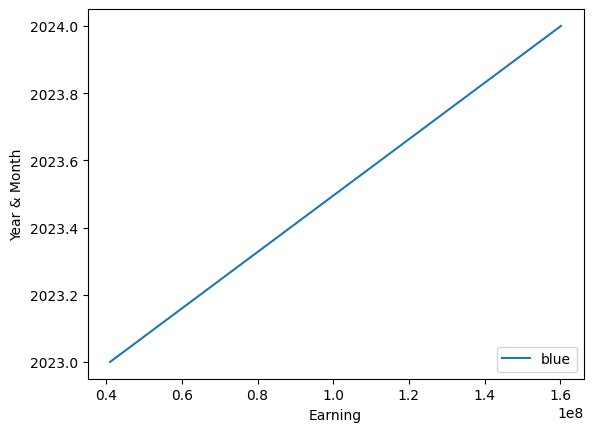

Predicted earnings for GAME next year: 160212265.58 dollars


In [8]:
# Get user input for the game category and convert it to uppercase
category = input("Enter the game category: ")
category = category.upper()

# Get the earnings prediction for the specified category
if category in grouped_data.index:
    category_installs = grouped_data.loc[category]["Installs"]
    category_earnings = grouped_data.loc[category]["Earnings"]
    predicted_earnings = category_earnings * (next_year_earnings / category_earnings)

    # Plot the earnings prediction
    x = [category_earnings, predicted_earnings]
    y = [2023, 2024]
    plt.plot(x, y)
    plt.xlabel("Earning")
    plt.ylabel("Year & Month")
    plt.legend(["blue", "green"], loc="lower right")
    plt.show()

    # Print the earnings prediction for the specified category
    print(f"Predicted earnings for {category} next year: {predicted_earnings:.2f} dollars")
else:
    print(f"{category} not found in the data")